## Import

In [13]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

## Be sure to used Tensorflow 2.0

In [14]:
assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [17]:
from sklearn.preprocessing import StandardScaler

# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)
images_test = scaler.transform(images_test)

print(images.shape)
print(targets.shape)

(10000, 784)
(10000,)


## Plot one of the data

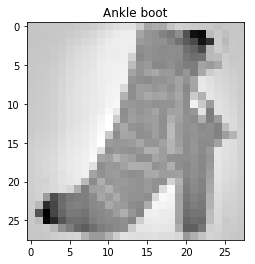

In [19]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

# Create the model
![](images/simple_nn.png)

# Create the model

In [21]:
# Flatten
model = tf.keras.models.Sequential()

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

[[0.0164686  0.07011577 0.01327275 0.10447739 0.5685196  0.04357202
  0.06041333 0.03420093 0.01752688 0.07143278]] [9]


## Model Summary

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  32896     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [23]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Train the model

In [24]:
history = model.fit(images, targets, epochs=10, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000==============================] - 1s 79us/sample - loss: 1.7593 - acc: 0.4255 - val_loss: 1.2523 - val_acc: 0.6130
Epoch 2/10
8000/8000==============================] - 0s 62us/sample - loss: 1.0684 - acc: 0.6745 - val_loss: 0.9614 - val_acc: 0.6965
Epoch 3/10
8000/8000==============================] - 0s 62us/sample - loss: 0.8749 - acc: 0.7216 - val_loss: 0.8372 - val_acc: 0.7275
Epoch 4/10
8000/8000==============================] - 0s 61us/sample - loss: 0.7781 - acc: 0.7446 - val_loss: 0.7675 - val_acc: 0.7440
Epoch 5/10
8000/8000==============================] - 0s 61us/sample - loss: 0.7171 - acc: 0.7591 - val_loss: 0.7208 - val_acc: 0.7560
Epoch 6/10
8000/8000==============================] - 0s 60us/sample - loss: 0.6740 - acc: 0.7703 - val_loss: 0.6845 - val_acc: 0.7615
Epoch 7/10
8000/8000==============================] - 0s 61us/sample - loss: 0.6405 - acc: 0.7782 - val_loss: 0.6568 - val_acc: 0.7675
Epoch 8

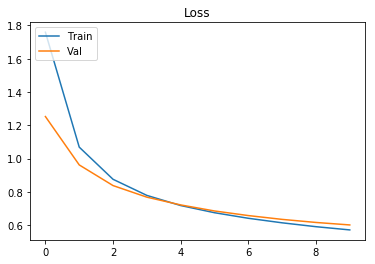

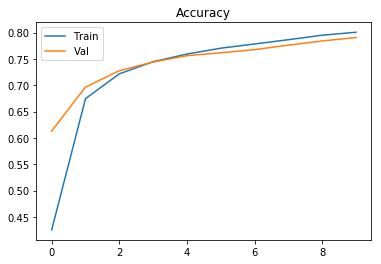

In [26]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [29]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

10000/10000==============================] - 0s 29us/sample - loss: 0.6160 - acc: 0.7819
Test Loss 0.6160361693382264
Test Accuracy 0.7819
